## 6.4 Supervised Machine Learning: Regression 

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = '/Users/datcaodo/Documents/World Happiness Report 2024'

In [4]:
df = pd.read_csv(os.path.join(path, '03 Data', 'df.csv'))

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'Country name', 'year', 'Life Ladder',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Social support category'],
      dtype='object')

In [7]:
df.head(20)

,Unnamed: 0,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Social support category
0,0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258,Low Support
1,1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237,Low Support
2,2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275,Low Support
3,3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267,Low Support
4,4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268,Low Support
5,5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.059,0.823,0.547,0.273,Low Support
6,6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.102,0.871,0.492,0.375,Low Support
7,7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.078,0.881,0.491,0.339,Low Support
8,8,Afghanistan,2016,4.220,7.650,0.559,52.925,0.523,0.040,0.793,0.501,0.348,Low Support
9,9,Afghanistan,2017,2.662,7.648,0.491,53.250,0.427,-0.123,0.954,0.435,0.371,Low Support


In [8]:
df.shape

(2008, 13)

##### Missing values

In [9]:
# Check for missing values

df.isnull().sum()


Unnamed: 0                          0
Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           9
Positive affect                     0
Negative affect                     0
Social support category             0
dtype: int64

In [12]:
# Imputing missing values with the mean 

df['Perceptions of corruption'].fillna(df['Perceptions of corruption'].mean(), inplace=True)


##### Duplicates check

In [13]:
dups = df.duplicated()

In [14]:
dups.shape # No dups

(2008,)

##### Extreme values checks

/var/folders/kq/b6pkx345701cskyhyz_88fhm0000gp/T/ipykernel_5060/1815485507.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Life Ladder'], bins=10) # Shows extreme values
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Life Ladder', ylabel='Density'>

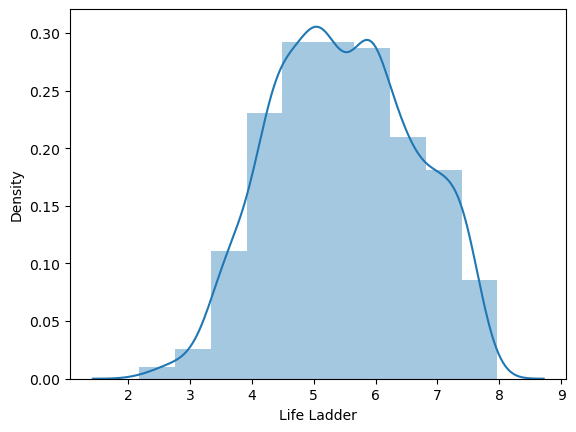

In [20]:
sns.distplot(df['Life Ladder'], bins=10) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [21]:
df['Life Ladder'].mean() # Check the mean

5.478295318725099

In [22]:
df['Life Ladder'].median() # Check the median

5.446

In [23]:
df['Life Ladder'].max() # Check the max

7.971

### 3. Data prep for regression analysis 

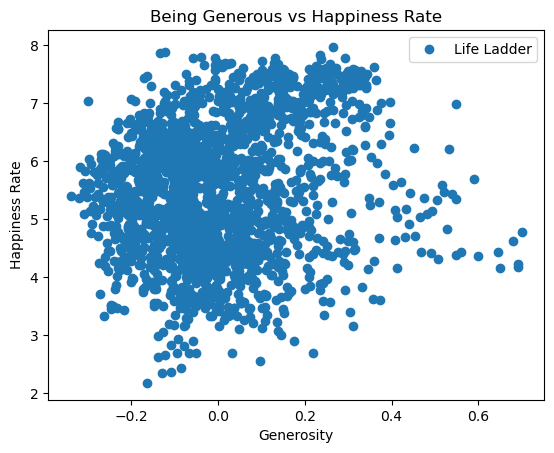

In [24]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Generosity', y='Life Ladder',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Being Generous vs Happiness Rate')  
plt.xlabel('Generosity')  
plt.ylabel('Happiness Rate')  
plt.show()

### Hypothesis

##### In the World Happiness Report 2024, there exists a positive correlation between the level of generosity within a country and its citizens' subjective well-being, as measured by the Life Ladder score.

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Generosity'].values.reshape(-1,1)
y = df['Life Ladder'].values.reshape(-1,1)

In [27]:
X

array([[ 0.164],
       [ 0.187],
       [ 0.118],
       ...,
       [-0.079],
       [-0.073],
       [-0.069]])

In [28]:
y

array([[3.724],
       [4.402],
       [4.758],
       ...,
       [3.155],
       [3.296],
       [3.572]])

In [29]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [30]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [31]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

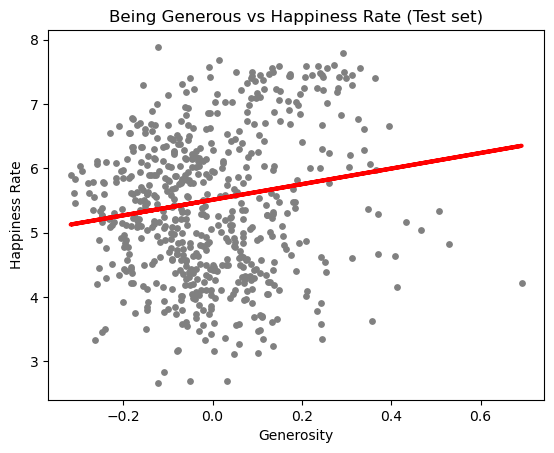

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Being Generous vs Happiness Rate (Test set)')
plot_test.xlabel('Generosity')
plot_test.ylabel('Happiness Rate')
plot_test.show()

We can see that the line is going in a positive way but there are still too many points that are above and below the line. 

In [37]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [38]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.21283769]]
Mean squared error:  1.2716772522326176
R2 score:  0.007859202181385139


In [39]:
y_predicted

array([[5.31755758],
       [5.46552378],
       [5.7299224 ],
       [5.48978053],
       [5.59408457],
       [5.35272987],
       [5.2217434 ],
       [5.43641568],
       [5.67898321],
       [5.35636839],
       [5.6753447 ],
       [5.88880413],
       [5.47886499],
       [5.53465553],
       [5.67170619],
       [5.64502376],
       [5.59651025],
       [5.54557107],
       [5.45096973],
       [5.47765216],
       [5.40973325],
       [5.34545285],
       [5.23751029],
       [5.58316904],
       [5.36728393],
       [5.32119609],
       [5.19627381],
       [5.40124338],
       [5.57953052],
       [5.39154068],
       [5.43035149],
       [5.73477375],
       [5.4436927 ],
       [6.15320275],
       [5.63289538],
       [5.82816225],
       [5.66321632],
       [5.24842583],
       [5.39032784],
       [5.47280081],
       [5.1380576 ],
       [5.69353727],
       [5.49341905],
       [5.48250351],
       [5.42671297],
       [5.46673662],
       [6.12530748],
       [5.279

In [40]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.711,5.317558
1,4.434,5.465524
2,5.480,5.729922
3,5.422,5.489781
4,4.833,5.594085
5,4.551,5.352730
6,4.764,5.221743
7,6.949,5.436416
8,4.544,5.678983
9,5.553,5.356368


##### Compare how the regression fits the training set

In [41]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [42]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.21283769]]
Mean squared error:  1.2644659340448714
R2 score:  0.030786083096213668


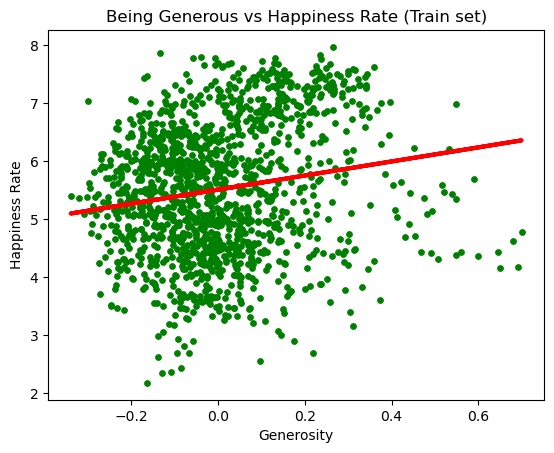

In [44]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Being Generous vs Happiness Rate (Train set)')
plot_test.xlabel('Generosity')
plot_test.ylabel('Happiness Rate')
plot_test.show()

I can see that the R2 score from the testing and the training sets were both below 10% which is an indicator that the hypothesis is not as true. Furthermore if we compare the predicted values and the actual values to each other we can see as well that there are not fitting. 

When it comes to Data bias, we need to make sure that the dataset includes more than 5000 total points. In this scenario there weren't as many. 